# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Общее положение исследования
Цель проекта - установка параметров для создания автоматизированной системы отслеживания аномалий и мошеннической деятельности на рынке недвижимости.

**Шаги исследования**
* Открытие файла с данными и изучение общей информации
* Предобработка данных, заполнение пропусков, обработка непонятных значений
* Расчет необходимых параметров для анализа
* Исследовательский анализ данных
* Общий вывод


**Описание данных:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортирую библиотеки:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


In [2]:
# Предпочтительный интерфейс
#sb.set()

In [3]:
# Количество строк в таблице не больше 5
#pd.set_option('max_rows',5)

# Текст в ячейке отражается полностью вне зависимости от длины
pd.set_option('display.max_colwidth', None)

# Все числа отражаются с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

# Сброс ограничений на число столбцов таблицы
pd.set_option('display.max_columns', None)


In [4]:
# Открываю датасет:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')


In [5]:
# Посмотрим полную информацию датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# Исправляю стилистическую ошибку: название столбца 'cityCenters_nearest' оформлю в "змеином_стиле":
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [7]:
# Проверяю исправления информации датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
# Посмотрим, как выглядят данные в датафрейме:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [9]:
# Проверяю датасет на наличие дубликатов
print('\nЧисло дубликатов:', df.duplicated().sum())


Число дубликатов: 0


**Построим  гистограмму для всех столбцов датафрейма**

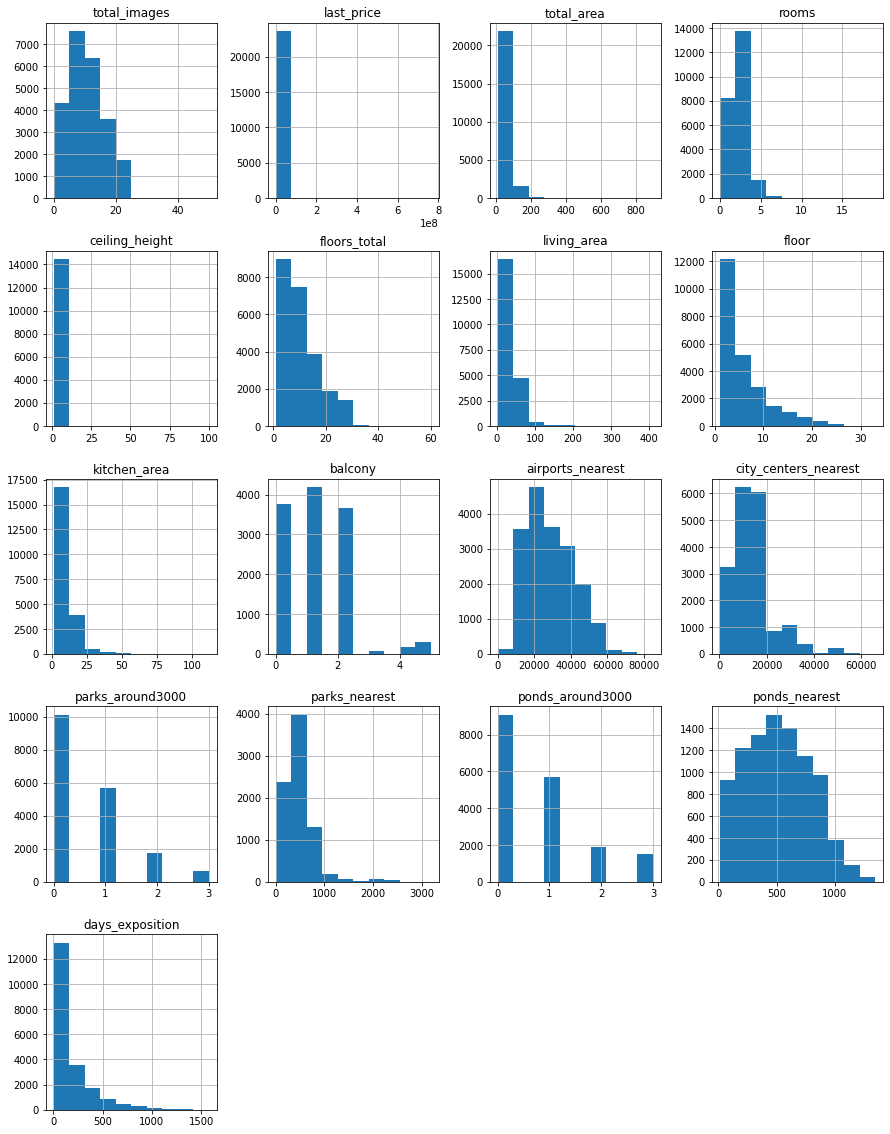

In [10]:
#df.hist(figsize=(15, 20))
#df.hist(figsize=(15, 20));
df.hist(figsize=(15, 20));

**Допустимый обьем потерь датасета**

In [11]:
# Посмотрим краткую информацию датафрейма:
df.shape

(23699, 22)

In [12]:
for i in [2,5,10,15,20]:
    print(i, '% это', int(len(df)*i/100),'строк датафрейма.\n')

2 % это 473 строк датафрейма.

5 % это 1184 строк датафрейма.

10 % это 2369 строк датафрейма.

15 % это 3554 строк датафрейма.

20 % это 4739 строк датафрейма.



_На этапе исследования предобработки данных, придется избавляться от части строк датасета (недостоверные, неполные данные и т.д.)_  
    _Из 23699 строк потеря данных в несколько процентов 5% или даже 10%, будет не критичной._  
    _Потеря данных более 10%, приведет к искажению результатов._
* Всего в датафрейме 23699 строк
* В столбцах floors_total и locality_name заполнены данными более 98% строк, пропуски далее можно будет удалить в связи с малочисленностью.
* В столбце balcony 12000 пропусков, скорее всего это означает что в квартире нет балкона и пропуски можно заменить на 0.
* Для целого ряда столбцов есть пропущенные значения.


### Предобработка данных

**Для предварительной обработки данных определим и изучим пропущенные значения:**

In [13]:
# Посмотрим, в каких столбцах датафрейма есть пропуски и оценим их количество:
n = 0
for column in df.columns:
    if df[column].isna().sum() > 0:
        na = df[column].isna().sum()
        print ('%-30s  %-20.2f' %(df.columns[n],   (100*na/len(df))))
    n += 1

ceiling_height                  38.80               
floors_total                    0.36                
living_area                     8.03                
is_apartment                    88.29               
kitchen_area                    9.61                
balcony                         48.61               
locality_name                   0.21                
airports_nearest                23.38               
city_centers_nearest            23.29               
parks_around3000                23.28               
parks_nearest                   65.91               
ponds_around3000                23.28               
ponds_nearest                   61.56               
days_exposition                 13.42               


In [14]:
pd.DataFrame(round(df.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


 __Согласно полученным данным, пропуски имеются в следующих столбцах:__

* `ceiling_height` - 38.8% пропусков. Здесь пропуски можно заменить медианной высотой потолков среди всех объявлений.  


* `floors_total` - 0.36% пропусков. Пропусков мало, на общую выборку влияния не окажут.  


* `kitchen_area` - 9.6% пропусков. Пропуски можно заменить медианными значениями площади кухни в квартирах с одинаковым количеством комнат, исходя из известной общей площади квартир и медианной доли кухни.


* `living_area` - 8% пропусков. Пропуски можно заменить аналогичным способом, что и с площадью кухни.


* `is_apartment` - 88.3% пропусков. Здесь пропуски скорее всего вызваны некорректным указанием информации. Для исправления    заменим пропуски на "False".


* `balcony` - 48.6% пропусков. Скорее всего пропуски обусловлены отсутствием указания балкона в квартире, будет логично заменить на "0".


* `locality_name` - 0.21% пропусков. Пропуски можно заменить на "no_info".


* `airports_nearest` - 23.4 % пропусков. Можно заменить медианным расстоянием от квартир в населенном пункте до аэропорта.


* `city_centers_nearest` - 23.3 % пропусков. Можно заменить медианным расстоянием от квартир в населенном пункте до центра города.


* `parks_around3000` - 23.3% пропусков. Скорее всего пропуски соответствуют тем местам, где парков поблизости нет. Заменим пропущенные значения на "0".	


* `parks_nearest` - 65.9% пропусков. Замену можно произвести исходя из медианного расстояния до ближайшего парка в каждом населенном пункте и значения в столбце parks_around3000, отличного от нуля.


* `ponds_around3000` - 23.3% пропусков. Скорее всего пропуски соответствуют тем местам, где водоемов поблизости нет. Заменим пропущенные значения на "0".


* `ponds_nearest` - 61.5% пропусков.  Замену можно произвести исходя из медианного расстояния до ближайшего водоёма в каждом населенном пункте и значения в столбце ponds_around3000, отличного от нуля.


* `days_exposition` - 13.4% пропусков. Тип данных оставляем без изменений. Пропуски не трогаем.

__Заполним пропущенные значения там, где это возможно:__

Столбец `balcony`:

Если продавец не указал число балконов, то, скорее всего, в квартире их нет.  
Такие пропуски правильно заменить на 0.

In [15]:
# Проверяем наличие других аномалий, кроме пропущенных значений
df['balcony'].unique()


array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [16]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

> Устранены пропуски в столбце с информацией о балконах.

Столбец `is_apartment`:

Продавцы рынка коммерческой недвижимости являются профессионалами в своей сфере, и максимально полно описывают обьект продажи.  
В частных обьявлениях, продавцы могут не понимать разницы между "квартирой" и "апартаментами", и это поле в обьявлении может быть не заполнено.  
Заполним все пропуски значениями False по умолчанию.

In [18]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [20]:
# Заполним все пропуски значениями False по умолчанию.
df['is_apartment'] = df['is_apartment'].fillna(False)

In [21]:
df['is_apartment'].unique()

array([False,  True])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

> Пропуски в столбце с информацией об апартаментах устранены.

Столбцы `kitchen_area` и `living_area`:

Логично предположить, что площадь кухни могут не указывать в обьявлениях, если она не выделена в отдельную комнату, например в квартирах-студиях или квартирах со свободной планировкой. Площадь кухни в этом случае входит в состав общей жилой площади.

In [23]:
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['studio']),0)
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['open_plan']),0)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
23694   0.00
23695   0.00
23696   0.00
23697   0.00
23698   0.00
Name: kitchen_area, Length: 23699, dtype: float64

В некоторых объявлениях продавцы указывают общую площадь объекта недвижимости, но не указывают ее распределение на жилую/нежилую, и площадь кухни.  
Для таких объявлений заполним отсутствующую информацию медианными значениями, через коэфициент, отражающий медианную долю кухни/жилой площади в общей площади квартиры.

In [24]:
# Коэффициент доли жилой площади в общей площади квартиры (рассчитанный по медианным значениям):
kf_living_area = df['living_area'].median() / df['total_area'].median()
# Коэффициент доли площади кухни в общей площади квартиры (рассчитанный по медианным значениям):
kf_kitchen_area = df['kitchen_area'].median() / df['total_area'].median()

Применим полученные коэфициенты, чтобы заполнить пропуски.

In [25]:
df['living_area'] = df['living_area'].fillna(kf_living_area*df['total_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(kf_kitchen_area*df['total_area'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

> Устранены пропуски в столбце с информацией о площади кухни и жилой площади в квадратных метрах (м²).

Столбец `locality_name`:

In [27]:
# Заполняю пропуски
df['locality_name'] = df['locality_name'].fillna('no_info')
# Вывожу общую информацию df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Пропуски в населённых пунктах устранены.  
Для дальнейшей работы с датафреймом избавимся от неявных дубликатов в названиях населённых пунктов.

In [28]:
# Кол-во уникальных названий населенных пунктов датасете.
len(df['locality_name'].dropna().unique())

365

Общий список названий:

In [29]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим все буквы "ё" на "е".  
В некоторых названиях содержится две буквы "ё", например: 'посёлок Молодёжное'.

In [30]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е", 2)

Также присутствуют неявные дубликаты при использовании типа населенного пункта:    
Например, «поселок Рябово» и «поселок городского типа Рябово» — это обозначения одних и тех же населённых пунктов.

In [31]:
# Исправляем дубликаты.
locality_name_pgt = df['locality_name'] 
new_locality_name_pgt = [_.replace("поселок", "поселок городского типа", 1) for _ in locality_name_pgt]
df['locality_name'] = new_locality_name_pgt

In [32]:
# Кол-во уникальных названий населенных пунктов датасете.
len(df['locality_name'].dropna().unique())

331

In [33]:
# Общая информация df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

> Устранены пропуски в столбце с информацией о названиях населенных пунктах.

Столбец `ceiling_height`:

Посмотрим на общую информацию в столбце "высота потолков"

In [34]:
df['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Высоты потолков в 1 метр и 100 метров - безусловно ошибочны.  
Построим гистограммы для 3 разных интервалов высоты потолков:

* от 0 до 2 метров;
* от 2 до 6 метров;
* от 6 до 100 метров.

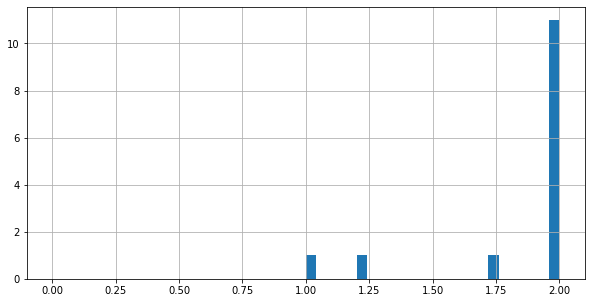

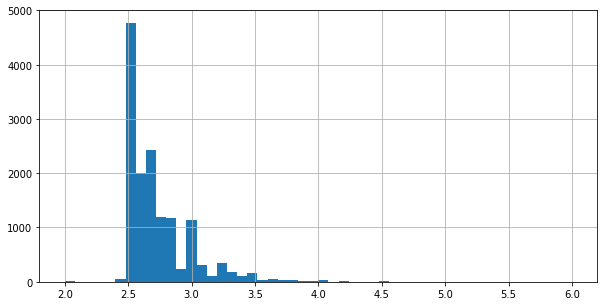

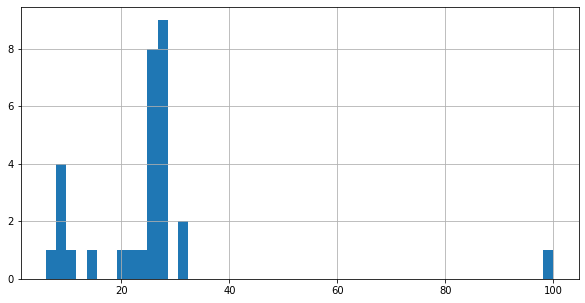

In [35]:
df['ceiling_height'].hist(bins=50, range=(0,2), figsize=(10,5))
plt.show()
df['ceiling_height'].hist(bins=50, range=(2,6), figsize=(10,5))
plt.show()
df['ceiling_height'].hist(bins=50, range=(6,100), figsize=(10,5))
plt.show()

Видно, что количество аномальных значений невелико.  
Основные размеры потолков лежат в диапазоне от 2,5 до 3,5 метров.  
На третьей диаграмме имеется "всплеск" значений от 18 до примерно 36 метров.   
Вероятно была пропущена запятая, и таким образом высота потолка стала больше в 10 раз.  
_Заменим эти значения на более реальные:_

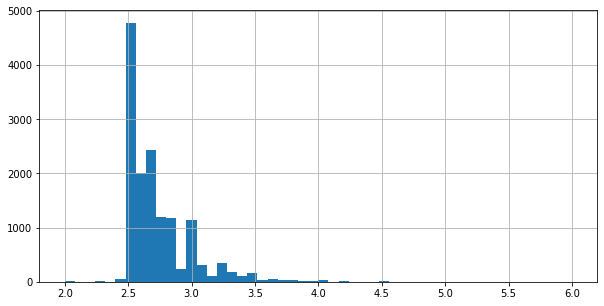

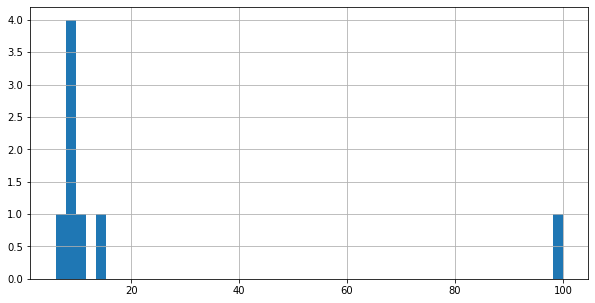

In [36]:
# Присваиваю индексы для "ошибочных" высот
index_ceiling = df.query('ceiling_height > 18 and ceiling_height < 36').index 
df.loc[index_ceiling, 'ceiling_height'] = df.loc[index_ceiling, 'ceiling_height'] / 10
df['ceiling_height'].hist(bins=50, range=(2,6), figsize=(10,5))
plt.show()
df['ceiling_height'].hist(bins=50, range=(6,100), figsize=(10,5))
plt.show()

Избавились от аномальных значений в интервале от 18 до 36 метров.  
Оставшиеся строки с аномальными значениями высот потолков (интервалы до 1,8 метра, от 6 до 18 метров, и 100 метров) удалим. 

In [37]:
index_ceiling_delete = df.query('ceiling_height<1.8 or 6<ceiling_height<18 or ceiling_height>36').index

# Количество строк до удаления
print(len(df)) 
df.drop(index_ceiling_delete, inplace=True, axis=0)

# Количество строк после удаления
print(len(df)) 
df.reset_index(inplace=True, drop=True)

23699
23689


Избавились от 10 "аномальных" потолков.  
Приступаю к заполнению пропусков.

In [38]:
df['ceiling_height'].describe()

count   14494.00
mean        2.73
std         0.28
min         2.00
25%         2.51
50%         2.65
75%         2.80
max         6.00
Name: ceiling_height, dtype: float64

Медианное значение не изменилось, а вот среднее уменьшилось примерно на 5 см.  
Поэтому заполнение пропусков медианным значением окажет меньшее влияние на "средние" показатели высот потолков.

In [39]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23689 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

> Устранены пропуски в столбце с информацией о высоте потолков.

 Столбец `days_exposition`:

В столбце `days_exposition` указано количество дней, в течении которых было размещено объявление (от публикации до снятия).


In [40]:
# Ищем пустые значения, и выводим их сумму
df['days_exposition'].isna().sum()

3181

In [41]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок городского типа Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,91.73,9,False,False,False,27.82,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


> Скорее всего, отсутствие данных в этом столбце означает, что данный показатель не может быть рассчитан, поскольку объявление о продаже еще не снято..  


Столбец `airports_nearest`:

Посмотрим наличие значений вэтом столбце:

In [42]:
df['airports_nearest'].describe()

count   18149.00
mean    28794.89
std     12632.16
min         0.00
25%     18585.00
50%     26726.00
75%     37277.00
max     84869.00
Name: airports_nearest, dtype: float64

Минимальное значение 0 - это явно ошибка.  
Посмотрим, сколько значений менее 1000 метров, эти значения можно будет заменить медианными:

In [43]:
df[df['airports_nearest']<1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21078,0,7000000.00,34.70,2018-09-23T00:00:00,1,2.70,9.00,19.80,3,False,False,False,6.00,2.00,Санкт-Петербург,0.00,22801.00,0.00,NaN,0.00,NaN,60.00


Есть одно значение! Сделаем его пропущенным:

In [44]:
df.loc[21078, 'airports_nearest'] = np.nan

Найдем медианы для каждого населенного пункта:

In [45]:
airports_median = df.groupby('locality_name')['airports_nearest'].median().sort_values()
airports_median = airports_median.dropna()
print(airports_median)

locality_name
поселок городского типа Александровская   12896.50
Пушкин                                    15766.00
поселок городского типа Шушары            17427.00
Павловск                                  20529.50
поселок городского типа Петро-Славянка    20605.00
no_info                                   22041.00
Красное Село                              25717.00
поселок городского типа Металлострой      25758.00
Колпино                                   26232.00
поселок городского типа Усть-Ижора        26510.50
Санкт-Петербург                           26757.50
поселок городского типа Стрельна          28317.00
поселок городского типа Понтонный         30642.00
поселок городского типа Саперный          34147.50
Петергоф                                  39231.00
Ломоносов                                 48415.50
поселок городского типа Мурино            51553.00
поселок городского типа Левашово          52693.00
поселок городского типа Парголово         53426.00
поселок городског

In [46]:
# Кол-во уникальных названий населенных пунктов датасете.
len(df['locality_name'].dropna().unique())

331

>Для многих населенных пунктов не удалось найти медианные значения расстояния до аэропорта, поэтому все значения оставим без изменений.

Столбец `city_centers_nearest`:

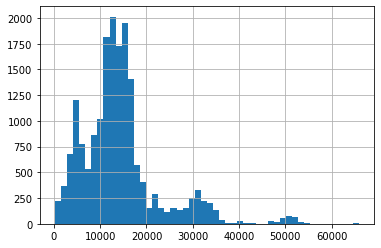

In [47]:
# Построим гистограмму.

df['city_centers_nearest'].hist(bins=50)
plt.show()

Аномалий нет.  
Определим медианные значения.

In [48]:
center_median = df.groupby('locality_name')['city_centers_nearest'].median().sort_values()
center_median = center_median.dropna()
print(center_median)

locality_name
no_info                                    8943.00
Санкт-Петербург                           12245.00
поселок городского типа Парголово         19311.00
поселок городского типа Мурино            21888.00
поселок городского типа Стрельна          23506.00
поселок городского типа Шушары            24212.00
поселок городского типа Левашово          25727.00
поселок городского типа Песочный          26099.50
поселок городского типа Петро-Славянка    27165.00
поселок городского типа Александровская   27468.00
поселок городского типа Металлострой      27602.00
Пушкин                                    27930.50
поселок городского типа Усть-Ижора        28222.50
поселок городского типа Лисий Нос         28226.00
Красное Село                              29142.00
Колпино                                   32018.00
поселок городского типа Понтонный         32354.00
Павловск                                  32683.00
Петергоф                                  33771.00
поселок городског

>Изменений немного, так как информация получена для малого кол-ва населенных пунктов.  
Все значения оставим без изменений.

Столбец ` parks_nearest`:

Повторим те же операции, что и с расстояниями до аэропорта и центра города:

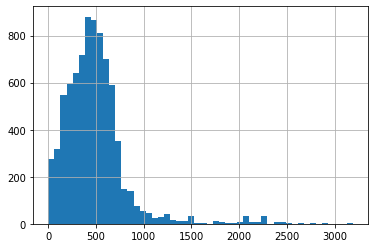

In [49]:
df['parks_nearest'].hist(bins=50)
plt.show()

Аномальных значений нет.

In [50]:
parks_median = df.groupby('locality_name')['parks_nearest'].median().sort_values()
parks_median = parks_median.dropna()
print(parks_median)

locality_name
Зеленогорск                         147.50
Кронштадт                           293.00
Петергоф                            294.00
Павловск                            312.00
Сестрорецк                          367.00
Колпино                             393.00
Пушкин                              399.50
Ломоносов                           407.00
Красное Село                        428.50
Санкт-Петербург                     460.00
no_info                             472.00
поселок городского типа Стрельна    700.00
поселок городского типа Парголово   733.00
Name: parks_nearest, dtype: float64


> Малое кол-во значений говорит скорее о том, что далеко не в каждом населенном пункте есть парк.  
Все значения оставим без изменений.

Повторим  операции по аналогии со столбцом  `parks_nearest` :

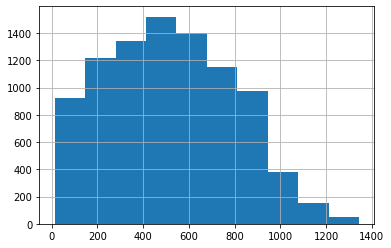

In [51]:
df['ponds_nearest'].hist()
plt.show()

Выбросов нет.  

In [52]:
# Определяем медианные значения.
ponds_median = df.groupby('locality_name')['ponds_nearest'].median().sort_values()
ponds_median = ponds_median.dropna()
print(ponds_median)

locality_name
поселок городского типа Мурино            133.00
Красное Село                              225.50
Кронштадт                                 312.00
поселок городского типа Белоостров        320.00
Сестрорецк                                372.00
no_info                                   374.00
поселок городского типа Саперный          419.50
Пушкин                                    444.00
Павловск                                  458.00
Петергоф                                  474.00
Санкт-Петербург                           503.00
Зеленогорск                               507.00
Колпино                                   509.00
Ломоносов                                 553.00
поселок городского типа Шушары            584.50
поселок городского типа Парголово         593.00
поселок городского типа Понтонный         638.00
поселок городского типа Петро-Славянка    663.00
поселок городского типа Александровская   711.50
поселок городского типа Стрельна          859.00
Name: 

Изменений будет немного, так как информация получена для малого кол-ва населенных пунктов.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23689 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

**Вывод:** 

>Большая часть пропусков, которые удалось устранить, являются добавленными пользователем.  
Основным способом устранения пропусков была выбрана "медианная замена", так как медианные значения оказывают наименьшее влияние на средние показатели в целом по таблице.  
Что касается картографических данных: по многим населенным пунктам сведения о расстояниях до их центра либо до аэропорта в принципе отсутствуют.  
Возможно это связано с ошибками в сервисе.  
Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. 

**Изменение типов данных**

Вывдем общую информацию о таблице:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23689 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

In [55]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок городского типа Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,91.73,9,False,False,False,27.82,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Произведем замены типов данных в следующих столбцах:  
* `first_day_exposition` - _'object'_ на _'datetime'_


* `balcony`     -  _'float64'_ на _'int64'_


* `parks_around3000` - _'float64'_ на _'int64'_


* `ponds_around3000` - _'float64'_ на _'int64'_


* `days_exposition` - _'float64'_ на _'int64'_


В первом случае замена необходима, поскольку для анализа интересна только дата размещения объявления.  
В остальных случаях значения в столбцах принимают целые значения.

In [56]:
# изменение столбец first_day_exposition дата, с помощью метода to_datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
# balcony тип данных flot, переведем в int с помощью метода astype()
df['balcony'] = df['balcony'].astype('int64')
# переведем столбец is_apartment в тип данных bool с помощью метода astype
df['is_apartment'] = df['is_apartment'].astype('bool')


In [57]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок городского типа Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,91.73,9,False,False,False,27.82,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


>Типы данных преобразованы. 

**Поиск дубликатов**

Дубликаты будем искать по тем столбцам, где мы не вносили изменений:

* `total_images`


* `last_price`


* `total_area`


* `first_day_exposition`

In [58]:
df_duplicated = df[df[['total_images', 'last_price','total_area','first_day_exposition']].duplicated(keep=False)]
df_duplicated.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19045,3,4370000.00,38.00,2016-06-23,1,2.65,9.00,19.50,1,False,False,False,6.65,0,Санкт-Петербург,27103.00,7640.00,1.00,624.00,0.00,NaN,620.00
19318,3,4370000.00,38.00,2016-06-23,1,2.65,9.00,21.92,2,False,False,False,6.65,0,Санкт-Петербург,27103.00,7640.00,1.00,624.00,0.00,NaN,620.00
9658,1,2533531.00,42.50,2016-09-08,1,2.56,18.00,19.80,7,False,False,False,7.44,0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.00
18418,1,2533531.00,42.50,2016-09-08,1,2.56,18.00,20.00,10,False,False,False,7.44,0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.00
10096,10,4400000.00,44.00,2017-11-22,1,2.65,17.00,17.00,14,False,False,False,13.00,2,Санкт-Петербург,42901.00,9267.00,0.00,NaN,0.00,NaN,71.00
21135,10,4400000.00,44.00,2017-11-22,2,2.65,9.00,27.00,8,False,False,False,6.00,1,Санкт-Петербург,49917.00,16755.00,1.00,235.00,0.00,NaN,72.00
14736,10,5142565.00,54.65,2018-10-01,2,2.65,5.00,26.00,3,False,False,False,9.56,0,Санкт-Петербург,47303.00,25866.00,1.00,251.00,1.00,350.00,145.00
18617,10,5142565.00,54.65,2018-10-01,2,2.65,5.00,26.00,5,False,False,False,9.56,0,Санкт-Петербург,47303.00,25866.00,1.00,251.00,1.00,350.00,145.00


Видим 4 пары возможных дубликатов:

Строки с индексами 19045 и 19318, все данные одинаковые. Есть небольшая разница в данных столбца `living_area`.     
Строку 19318 можно удалить.  
Строки с индексами 9658	и 18418, данные идентичны. Есть небольшая разница в данных столбца `living_area`.  
Строку 9658 можно удалить.  
Строки с индексами 10096 и 21135, отличий достаточно, пару оставляем.  
Строки с индексами 14736 и 18617, данные идентичны. Удалим строку 14736.


In [59]:
print('Число строк до удаления дубликатов',len(df))
df.drop([19318,9658,14736], axis=0, inplace=True)
print('Число строк после удаления дубликатов',len(df))

Число строк до удаления дубликатов 23689
Число строк после удаления дубликатов 23686


In [60]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

>Как видно из df, дубликаты удалены.

**Поиск аномальных значений**

В процессе устранения пропусков мы избавились от аномальных значений в некоторых столбцах:  

* `airports_nearest` - здесь было нулевое расстояние в одном случае;


* `ceiling_height` - ошибки были вызванны отсутствием запятой, вследствие чего были потолки высотой от 19 до 36 метров, а также был 100 м потолок и слишком низкие потолки от 1 до 1,8 м, от которых мы избавились.  

Остается проверить значения в столбцах:

* `last_price`
* `rooms`
* `total_area`
* `floor`
* `floors_total`

In [61]:
# Функция для получения столбца без аномалий (outliers)
# column_name -  название столбца
# возвращает - df с удаленными аномалиями 
def delete_outliers(column_name):
    iqr = 1.5 * (df[column_name].quantile(.75) - df[column_name].quantile(.25))
    
    maximum = df[column_name].quantile(.75) + iqr
    minimum = df[column_name].quantile(.25) - iqr
    
    return df[(minimum <= df[column_name]) & (df[column_name] <= maximum)][column_name]

In [62]:
def count_outliers(column_name):
    iqr = 1.5 * (df[column_name].quantile(.75) - df[column_name].quantile(.25))
    
    maximum = df[column_name].quantile(.75) + iqr
    print('Максимум -', maximum)
    
    minimum = df[column_name].quantile(.25) - iqr
    print('Минимум -', minimum)
    
    outliers = len(df.query(column_name + ' < @minimum or ' + column_name + ' > @maximum'))
    
    print('Количество выбросов - {} ({:.2%})'.format(outliers, outliers / len(df.query('~' + column_name + '.isnull()'))))

In [63]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок городского типа Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,91.73,9,False,False,False,27.82,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Рассмотрим столбец `last_price`:

In [64]:
df['last_price'].describe()

count       23686.00
mean      6542287.35
std      10889694.48
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

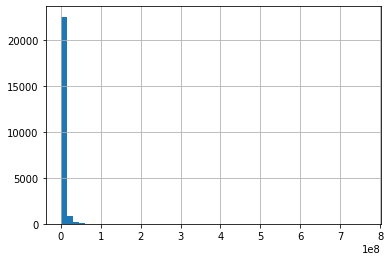

In [65]:
df['last_price'].hist(bins=50)
plt.show()

Плохо видно распределение. Разобьем на 3 части:

* менее 500000;
* от 500000 до 40000000;
* от 40000000 до 100000000.

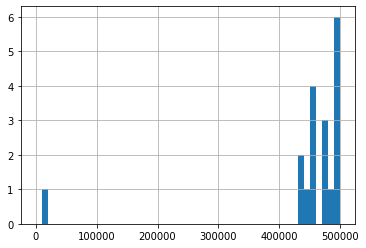

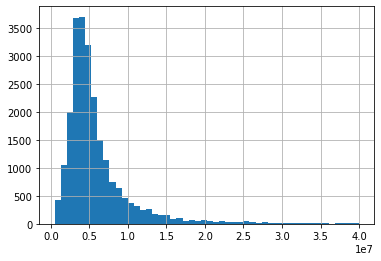

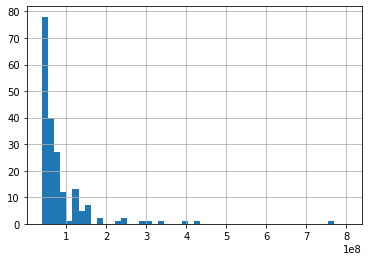

In [66]:
df['last_price'].hist(bins=50, range=(0,500000))
plt.show()
df['last_price'].hist(bins=50, range=(500000,40000000))
plt.show()
df['last_price'].hist(bins=50, range=(40000000, 800000000))
plt.show()

Большого кол-ва выбросов нет, поэтому будем рассматриватьтолько минимальное и максимальное значения.

In [67]:
index_last_price_min_max = df.query('last_price < 200000 or last_price > 700000000').index
df.loc[index_last_price_min_max, 'last_price']

8790        12190.00
12967   763000000.00
Name: last_price, dtype: float64

In [68]:
print(df.loc[8790])
print()
print()
print()
print(df.loc[12967])

total_images                              7
last_price                         12190.00
total_area                           109.00
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                          25.00
living_area                           32.00
floor                                    25
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                          40.50
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                   36421.00
city_centers_nearest                9176.00
parks_around3000                       1.00
parks_nearest                        805.00
ponds_around3000                       0.00
ponds_nearest                           NaN
days_exposition                        8.00
Name: 8790, dtype: object



tot

Цена квартиры площадбю 109 м2, скорее всего ошибочна (была изначально не правильно указана).  
Исправим цену, умножив ее значение на 1000.  
    
Цена квартиры площадью 400 м2 скорее всего соответствует истине.

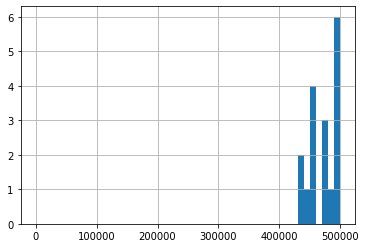

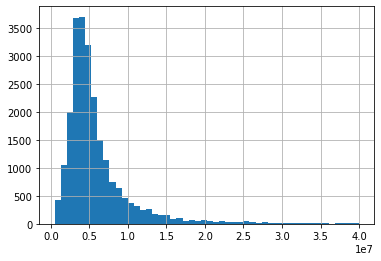

In [69]:
df.loc[8790, 'last_price'] = df.loc[8790,'last_price']*1000
df['last_price'].hist(bins=50, range=(0,500000))
plt.show()
df['last_price'].hist(bins=50, range=(500000,40000000))
plt.show()

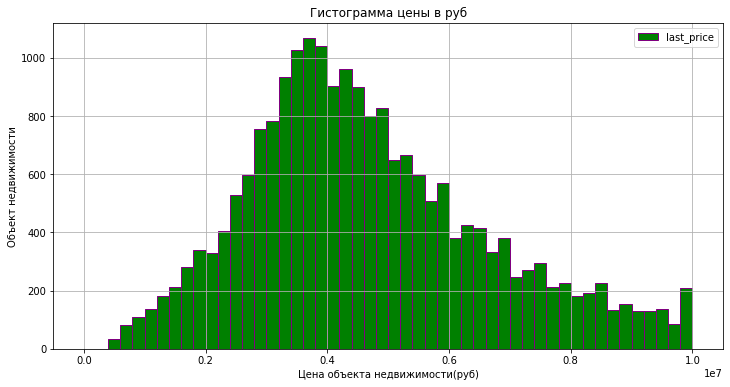

In [70]:
# построим гистограмму
df.hist('last_price', bins=50, range=(0,10000000) ,color = 'green', edgecolor='purple', legend=True, figsize=(12,6))

plt.title('Гистограмма цены в руб')
plt.xlabel('Цена объекта недвижимости(руб)')
plt.ylabel('Объект недвижимости')
plt.show;

In [71]:
# Вывод основных статистических параметров столбца
df['last_price'].describe()

count       23686.00
mean      6542801.49
std      10889673.64
min        430000.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

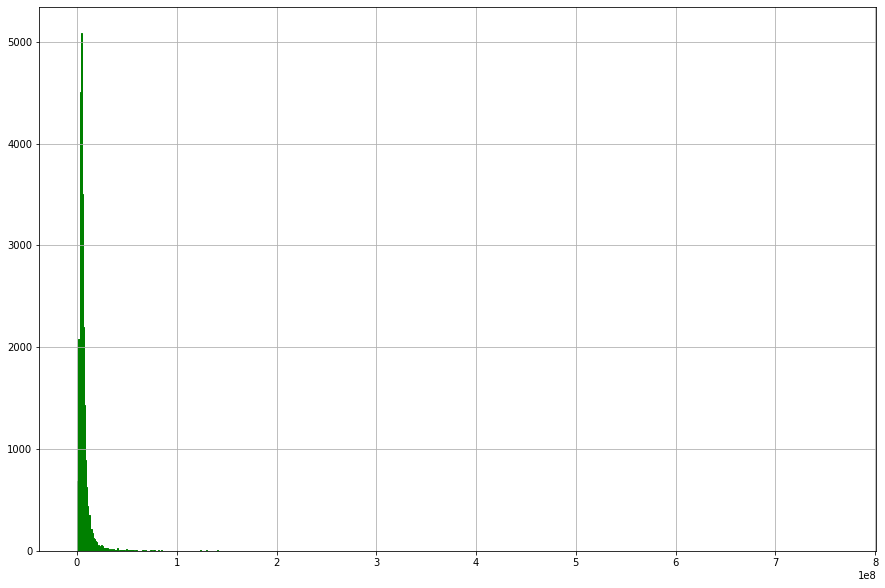

In [72]:
df['last_price'].hist(bins=700,color = 'green', edgecolor='green', figsize=(15, 10));

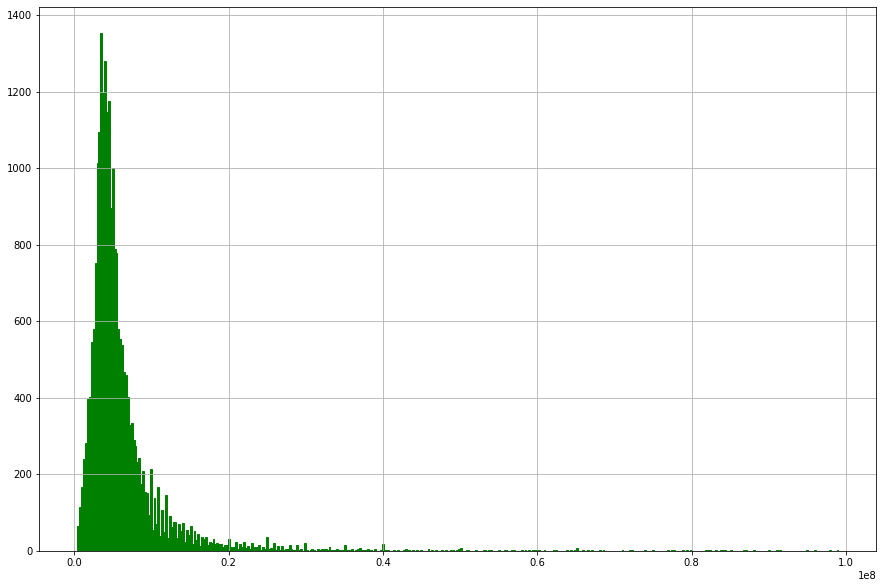

In [73]:
# Вывод гистограммы приближенно основной части данных столбца
df.query('last_price <= 1e8')['last_price'].hist(bins=400,color = 'green', edgecolor='green', figsize=(15, 10));

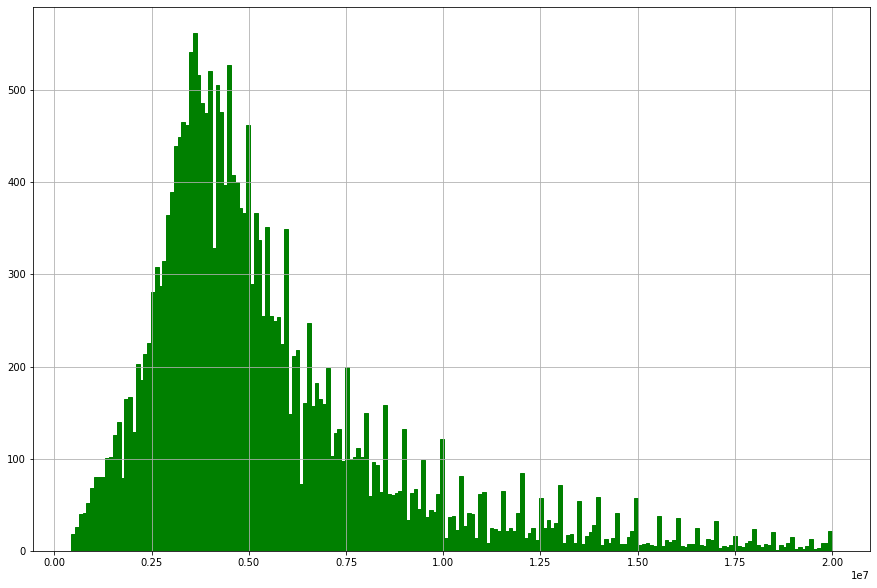

In [74]:
# Вывод гистограммы основной части данных столбца
df.query('last_price <= 0.2e8')['last_price'].hist(bins=200,color = 'green', edgecolor='green', figsize=(15, 10));

In [75]:
#df.query('last_price <= 0.2e8').boxplot(column='last_price');

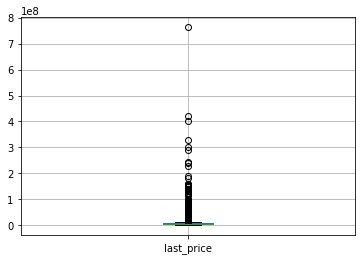

In [76]:
# Визуальная проверка наличия аномалий
df.boxplot(column='last_price');

In [77]:
# Оценка количества выбросов
count_outliers('total_images')

Максимум - 26.0
Минимум - -6.0
Количество выбросов - 25 (0.11%)


In [78]:
delete_outliers('total_images')

0        20
1         7
2        10
3         0
4         2
         ..
23681     9
23682    14
23683    18
23684    13
23685     4
Name: total_images, Length: 23661, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

>Количество квартир с ценой примерно до 3,5-4 млн. рублей равномерно растет, достигая пика. После этого значения количество квартир с ценой выше пиковой, равномерно снижается. Здесь выделяется квартира с максимальной стоимостью в 763 млн. рублей.

Рассмотрим столбец `total_area`:

In [80]:
df['total_area'].describe()

count   23686.00
mean       60.36
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

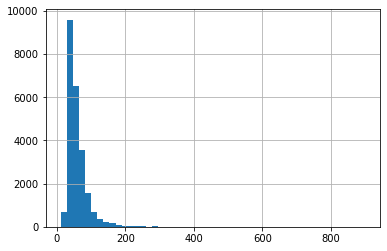

In [81]:
df['total_area'].hist(bins=50)
plt.show()

Распределение разобъем на 3 интервала:

* до 20 кв.м.;
* от 20 до 200 кв.м.;
* от 200 до 900 кв.м.

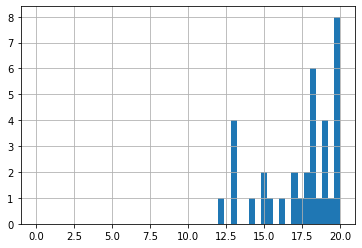

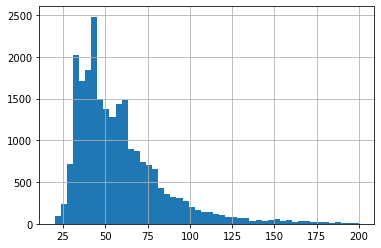

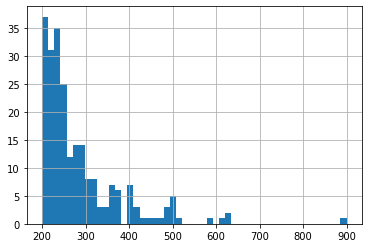

In [82]:
df['total_area'].hist(bins=50, range=(0,20))
plt.show()
df['total_area'].hist(bins=50, range=(20,200))
plt.show()
df['total_area'].hist(bins=50, range=(200,900))
plt.show()

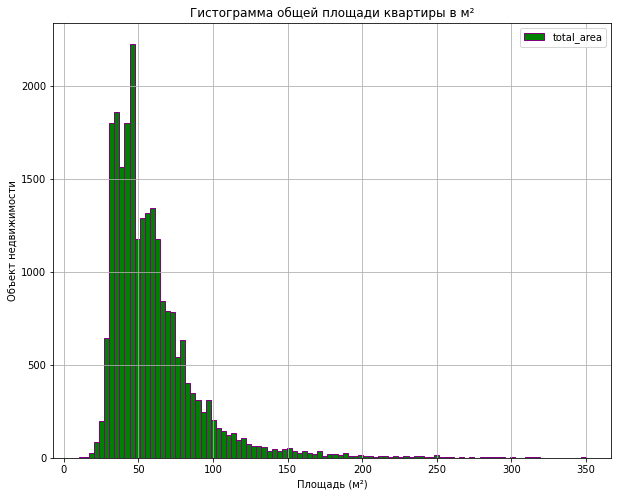

In [83]:
# построим гистограмму
df['total_area'].hist(bins =100, range = (10,350),color = 'green', edgecolor='purple', legend=True,figsize=(10,8))
# добавить ярлыки
plt.title('Гистограмма общей площади квартиры в м²')
plt.xlabel('Площадь (м²)')
plt.ylabel('Объект недвижимости')
plt.show;

In [84]:
df['total_area'].describe()

count   23686.00
mean       60.36
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

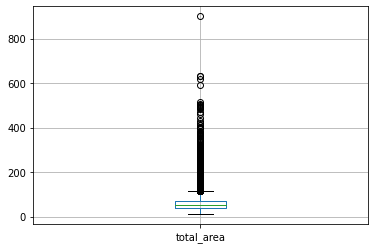

In [85]:
# Визуальная проверка наличия аномалий
df.boxplot(column='total_area');

In [86]:
# Оценка количества выбросов
count_outliers('total_area')

Максимум - 114.75000000000001
Минимум - -4.8500000000000085
Количество выбросов - 1240 (5.24%)


In [87]:
delete_outliers('total_area')

0       108.00
1        40.40
2        56.00
4       100.00
5        30.40
         ...  
23680    62.40
23682    59.00
23683    56.70
23684    76.75
23685    32.30
Name: total_area, Length: 22446, dtype: float64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

>На графике виден высокий пик на уровне 45 и длинный хвост уходящий вправо, после 270 с редкими выбросами. Можно предположить, что все что правее 250 будут являться выбросами.

Рассмотрим столбец `rooms`:

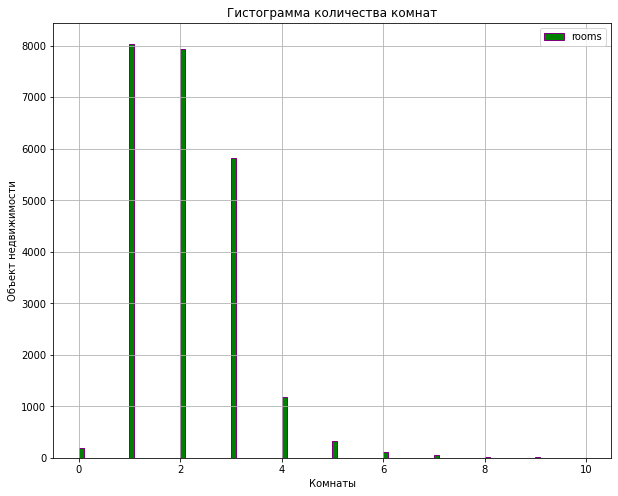

In [89]:
# построим гистограмму
df['rooms'].hist(bins =100, range = (0,10),color = 'green', edgecolor='purple', legend=True,figsize=(10,8))
# добавить ярлыки
plt.title('Гистограмма количества комнат')
plt.xlabel('Комнаты')
plt.ylabel('Объект недвижимости')
plt.show;

In [90]:
print(df['rooms'].describe())

count   23686.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64


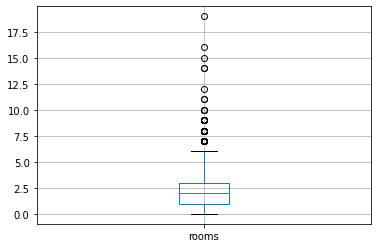

In [91]:
# Визуальная проверка наличия аномалий
df.boxplot(column='rooms');

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

In [93]:
# Оценка количества выбросов
count_outliers('rooms')

Максимум - 6.0
Минимум - -2.0
Количество выбросов - 90 (0.38%)


In [94]:
# Удаление выбросов
df['rooms'] = delete_outliers('rooms')

In [95]:
#delete_outliers('rooms')

<AxesSubplot:>

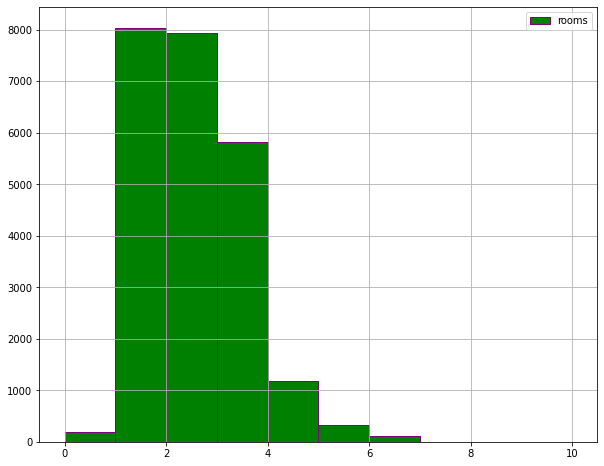

In [96]:
# Проверка результатов удаления
df['rooms'].hist(bins=10, range = (0,10),color = 'green', edgecolor='purple', legend=True,figsize=(10,8))

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23596 non-null  float64       
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

>Основная доля объявлений приходится на одно- и двухкомнатные квартиры (около 8000 объявлений каждая). Трехкомнатных квартир уже меньше - около 6000 объявлений. Четырехкомнатных квартир - чуть более 1000 объявлений. Остальные квартиры представлены уже крайне редко.

Рассмотрим столбец `floor`:

In [98]:
df['floor'].describe()

count   23686.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

Здесь нет каких либо аномалий, поэтому оставляем столбец как есть.

Рассмотрим столбец `floors_total`:

In [99]:
df['floors_total'].describe()

count   23600.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

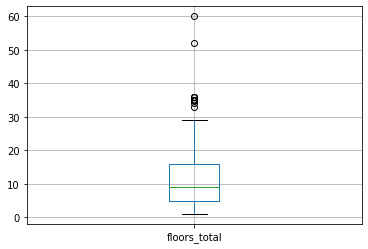

In [100]:
df.boxplot(column='floors_total')
plt.show()

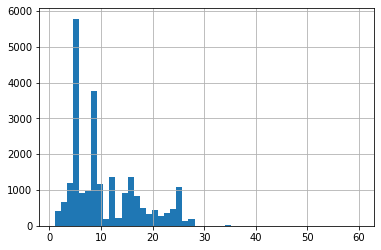

In [101]:
df['floors_total'].hist(bins=50)
plt.show()

Здесь так же нет никаких аномалий.

**Финальная подготовка датафрейма**

Посмотрим общую информацию df

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23596 non-null  float64       
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23686 non-null  float64       
 13  balcony         

In [103]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3.00,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1.00,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок городского типа Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2.00,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3.00,2.65,14.00,91.73,9,False,False,False,27.82,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2.00,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


У нас были пропуски в `locality_name` и `floors_total`. В первом случае мы заменили пропуски на значение "no_info", а во втором случае оставили без изменений. Однако, после удаления пропусков в других столбцах, можно сделать вывод, что удаление строк со значениями "no_info" в `locality_name` и с пропусками в `floors_total` не приведет к сильным изменениям датафрейма. К тому же по данным строкам невозможно будет произвести полноценный анализ. Поэтому избавимся еще от этих строк.

In [104]:
# Избавляемся от пропусков в `floors_total`
df = df.dropna(subset=['floors_total']) 
df.reset_index(drop=True, inplace=True)

# Переводим в целые числа, поскольку теперь пропусков нет
df['floors_total'] = df['floors_total'].astype('int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23600 entries, 0 to 23599
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  float64       
 2   total_area            23600 non-null  float64       
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23510 non-null  float64       
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int64         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23600 non-null  float64       
 13  balcony         

In [105]:
df = df.loc[df['locality_name']!='no_info']
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23552 entries, 0 to 23551
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23552 non-null  int64         
 1   last_price            23552 non-null  float64       
 2   total_area            23552 non-null  float64       
 3   first_day_exposition  23552 non-null  datetime64[ns]
 4   rooms                 23462 non-null  float64       
 5   ceiling_height        23552 non-null  float64       
 6   floors_total          23552 non-null  int64         
 7   living_area           23552 non-null  float64       
 8   floor                 23552 non-null  int64         
 9   is_apartment          23552 non-null  bool          
 10  studio                23552 non-null  bool          
 11  open_plan             23552 non-null  bool          
 12  kitchen_area          23552 non-null  float64       
 13  balcony         

>В итоге у нас датафрейм с 23552 строками.  
Изначально датафрейм имел 23600 строк.  
Таким образом были удалены **48 строк**, что является незначительным количеством.

**Вывод:**

>Произведены следующие этапы подготовки датафрейма к дальнейшему анализу:  
>
>* устранение пропущенных значений;
>* изменение типов данных;
>* удаление дубликатов;
>* поиск и устранение аномалий.
>
>
>Типы данных во всех столбцах соответствуют содержащейся в них информации.  
>
>Из датафрейма были удалены 48 строк, для работы с данными такое количество "потерянных" строк не является критическим.

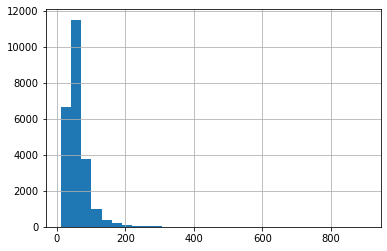

In [106]:
df2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(df2['total_area']).hist(bins=30);

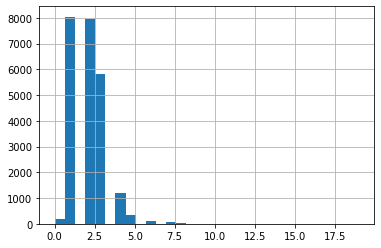

In [107]:
df2['rooms'].hist(bins=30);

In [108]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [109]:
plt.rcParams["axes.formatter.limits"] = (-5, 12)

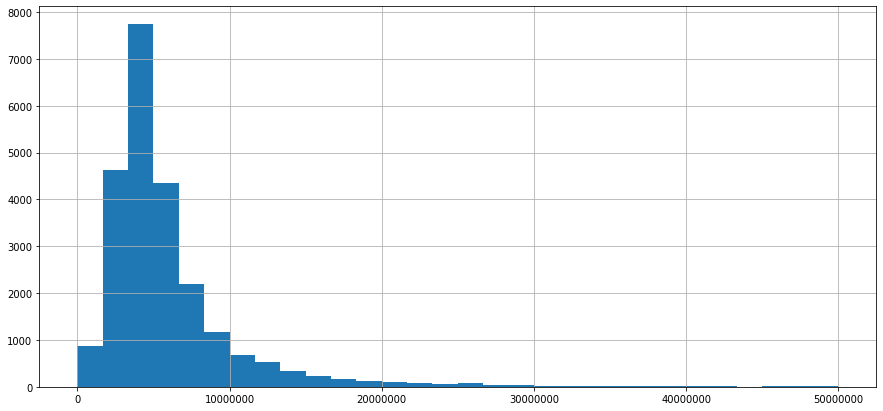

In [110]:
df2['last_price'].hist(bins=30, figsize=(15,7), range=[0, 50_000_000]);

In [111]:
df['last_price'].describe()

count       23552.000
mean      6541317.281
std      10913617.722
min        430000.000
25%       3400000.000
50%       4646000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64

In [112]:
print(df.shape[0])
print(df2.shape[0])

23552
23699


>Отбросил аномальные значения!  
По образцу твоего кода проверил сравнение. 

### Посчитайте и добавьте в таблицу новые столбцы

 Для дальнейшей работы необходимо добавить следующие столбцы в нашу таблицу:

* цена одного квадратного метра


* день недели публикации объявления (0 - понедельник, 1 - вторник и т.д.)


* месяц публикации объявления


* год публикации объявления


* тип этажа квартиры (значения — «первый», «последний», «другой»)


* расстояние в км до центра города

__Расчитаем цену одного квадратного метра и добавим его в таблицу:__

In [113]:
df['price_m2'] = df['last_price']/df['total_area']
# Цену одного м2 делаем для удобства целочисленной
df['price_m2'] = df['price_m2'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000.000,108.000,2019-03-07,3.000,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370
1,7,3350000.000,40.400,2018-12-04,1.000,2.650,11,18.600,1,False,False,False,11.000,2,поселок городского типа Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920
2,10,5196000.000,56.000,2015-08-20,2.000,2.650,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785
3,0,64900000.000,159.000,2015-07-24,3.000,2.650,14,91.731,9,False,False,False,27.825,0,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176
4,2,10000000.000,100.000,2018-06-19,2.000,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000


__Внесем в таблицу день, месяц и год публикации:__

In [114]:
#Добавим в датафрейм день недели:
df['weekday'] = df['first_day_exposition'].dt.weekday
sorted(df['weekday'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [115]:
#Добавим в датафрейм месяц публикации:
df['month'] = df['first_day_exposition'].dt.month
sorted(df['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [116]:
#Добавим в датафрейм год публикации:
df['year'] = df['first_day_exposition'].dt.year
sorted(df['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

In [117]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year
0,20,13000000.000,108.000,2019-03-07,3.000,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370,3,3,2019
1,7,3350000.000,40.400,2018-12-04,1.000,2.650,11,18.600,1,False,False,False,11.000,2,поселок городского типа Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920,1,12,2018
2,10,5196000.000,56.000,2015-08-20,2.000,2.650,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785,3,8,2015
3,0,64900000.000,159.000,2015-07-24,3.000,2.650,14,91.731,9,False,False,False,27.825,0,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176,4,7,2015
4,2,10000000.000,100.000,2018-06-19,2.000,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000,1,6,2018


__Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)__

Пройдемся циклом по датафрейму с данными:

In [118]:
df['floor_group'] = 'другой'
df['floor_group'] = df['floor_group'].where(df['floor'] > 1, 'первый')
df['floor_group'] = df['floor_group'].where(df['floor'] < df['floors_total'], 'последний')


In [119]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_group
0,20,13000000.000,108.000,2019-03-07,3.000,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370,3,3,2019,другой
1,7,3350000.000,40.400,2018-12-04,1.000,2.650,11,18.600,1,False,False,False,11.000,2,поселок городского типа Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920,1,12,2018,первый
2,10,5196000.000,56.000,2015-08-20,2.000,2.650,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785,3,8,2015,другой
3,0,64900000.000,159.000,2015-07-24,3.000,2.650,14,91.731,9,False,False,False,27.825,0,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176,4,7,2015,другой
4,2,10000000.000,100.000,2018-06-19,2.000,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000,1,6,2018,другой


__Добавим столбец, необходимый для анализа, расстояние в км до центра города:__

In [120]:
df['city_centers_km'] = round(df['city_centers_nearest']/1000, 0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_group,city_centers_km
0,20,13000000.000,108.000,2019-03-07,3.000,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1.000,2.650,11,18.600,1,False,False,False,11.000,2,поселок городского типа Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2.000,2.650,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785,3,8,2015,другой,14.000
3,0,64900000.000,159.000,2015-07-24,3.000,2.650,14,91.731,9,False,False,False,27.825,0,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176,4,7,2015,другой,7.000
4,2,10000000.000,100.000,2018-06-19,2.000,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000,1,6,2018,другой,8.000


__Вывод:__

>В таблицу добавлены следующие столбцы:
>
>* `price_m2` - цена одного квадратного метра  
>
>* `weekday` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)  
>
>* `month` - месяц публикации объявления  
>
>* `year` - год публикации объявления  
>
>* `floor_group` - тип этажа квартиры (значения — «первый», «последний», «другой»)  
>
>* `city_centers_km` - расстояние в км до центра города

### Проведите исследовательский анализ данных

__Изучим следующие параметры объектов и построим для них гистограммы:__  
* общая площадь
* жилая площадь
* площадь кухни
* цена объекта
* количество комнат
* высота потолков
* этаж квартиры
* тип этажа квартиры («первый», «последний», «другой»)
* общее количество этажей в доме
* расстояние до центра города в метрах
* расстояние до ближайшего аэропорта
* расстояние до ближайшего парка
* день и месяц публикации объявления

Столбец `total_area`, общая площадь:

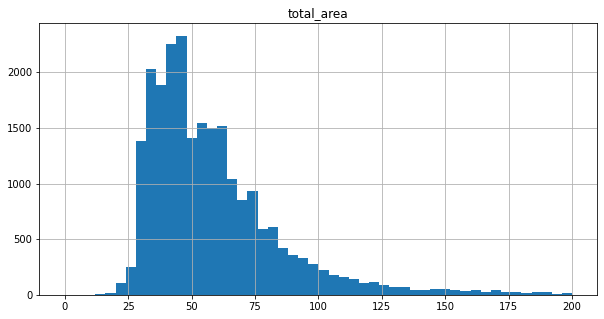

count   23552.000
mean       60.331
std        35.664
min        12.000
25%        40.000
50%        52.000
75%        69.700
max       900.000
Name: total_area, dtype: float64


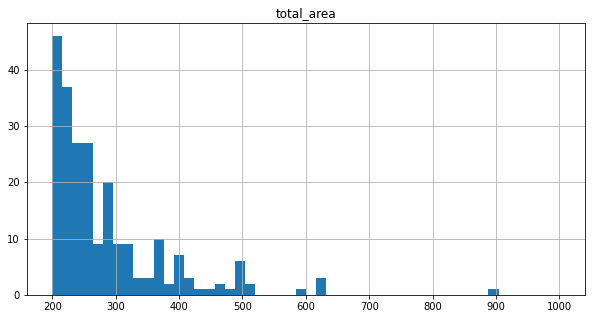

In [121]:
# Гистограмма для столбца площади квартиры
df.hist('total_area', bins=50, range=(0,200), figsize = (10,5))
plt.show()

print(df['total_area'].describe())

df.hist('total_area', bins=50, range=(200,1000), figsize = (10,5))
plt.show()

>Большинство квартир на рынке недвижимости имеют площадь в пределах от 30 до 80 кв.м.  
Это предположительно 1-2 комнатные квартиры.  
Кол-во квартир площадью более 80 кв.м. резко снижаются.  
На рынке есть квартира площадью 900 кв.м.

Столбец `living_area`, жилая площадь:

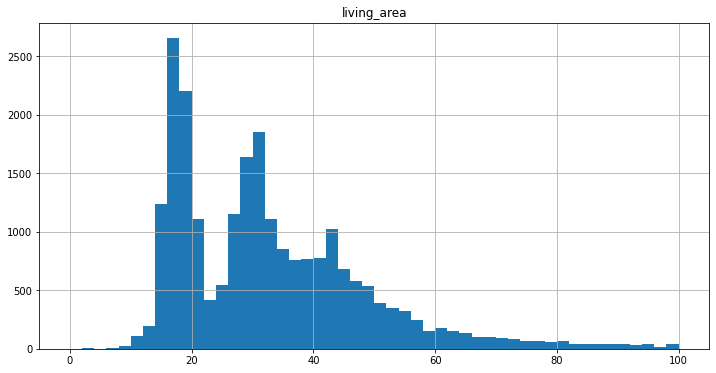

In [122]:
# Гистограмма для столбца жилая площадь
df.hist('living_area', bins=50, range = (0,100), figsize=(12,6))
plt.show()

In [123]:
print(df['living_area'].describe())

count   23552.000
mean       34.627
std        22.404
min         2.000
25%        19.000
50%        30.000
75%        42.115
max       409.700
Name: living_area, dtype: float64


>На гистограмме можно  заметить два основных пика: 18 и 30 кв.м.  
Скорее всего это вызвано тем, что на рынке преобладают одно и двух комнатные квартиры.

Столбец `kitchen_area`, площадь кухни:

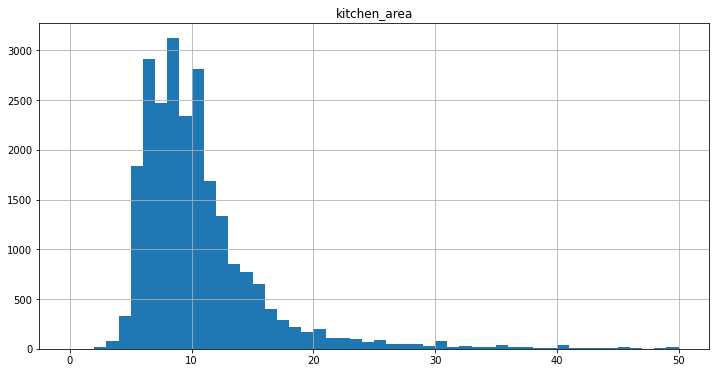

In [124]:
# Гистограмма для столбца площадь кухни
df.hist('kitchen_area', bins=50,range=(0,50),figsize=(12,6))
plt.show()

In [125]:
print(df['kitchen_area'].describe())

count   23552.000
mean       10.501
std         6.039
min         1.300
25%         7.000
50%         9.000
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64


>На гистограмме видно, что основные площади кухонь лежат в интервале от 6 до 12 кв.м.  
Топовые по цене объекты недвижимости могут похвастаться кухней более 15 кв.м.

Столбец `last_price`, цена объекта:

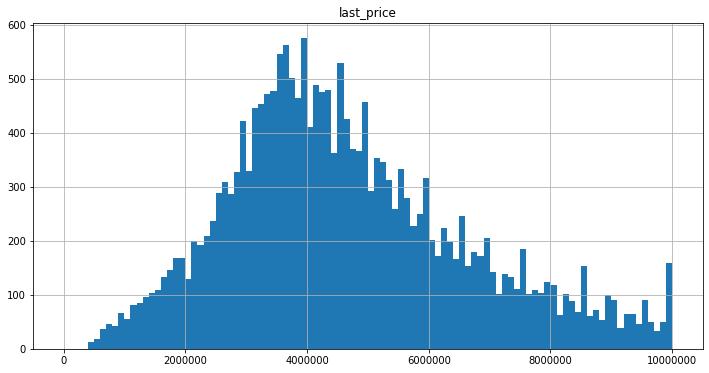

In [126]:
# Гистограмма для столбца цена обьекта
#df.hist('last_price', bins=100,range=(0,20000000), figsize=(12,6))
df.hist('last_price', bins=100,range=(0,10000000), figsize=(12,6))
plt.show()

In [127]:
print(df['last_price'].describe())

count       23552.000
mean      6541317.281
std      10913617.722
min        430000.000
25%       3400000.000
50%       4646000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64


>На пике находятся квартиры в ценовой категории 3.7 - 4 млн рублей.  
>Выделяется квартира с максимальной стоимостью в 763 млн. рублей. Это было изучено ранее, поэтому ошибки в данных нет.  


Столбец `rooms`, количество комнат:

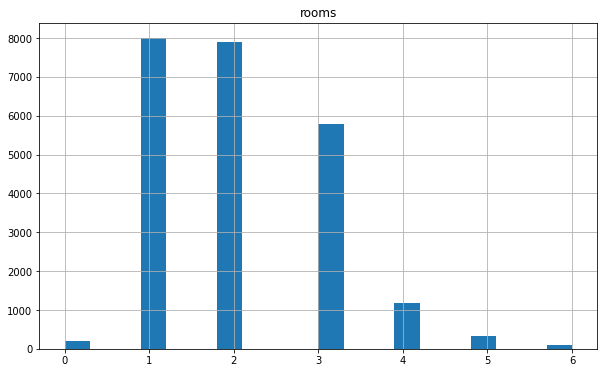

In [128]:
# Гистограмма для столбца количества комнат
df.hist('rooms', bins=20, figsize=(10,6))
plt.show()

In [129]:
print(df['rooms'].describe())

count   23462.000
mean        2.048
std         1.007
min         0.000
25%         1.000
50%         2.000
75%         3.000
max         6.000
Name: rooms, dtype: float64


>Основную долю объявлений составляют одно- и двухкомнатные квартиры (около 8000 объявлений каждая).  
Трехкомнатных квартир  меньше - около 6000 объявлений.  
Четырехкомнатных квартир  - чуть более 1000 объявлений.  
В сумме данные планировки занимают около 90% рынка.

Столбец `ceiling_height`, высота потолков:

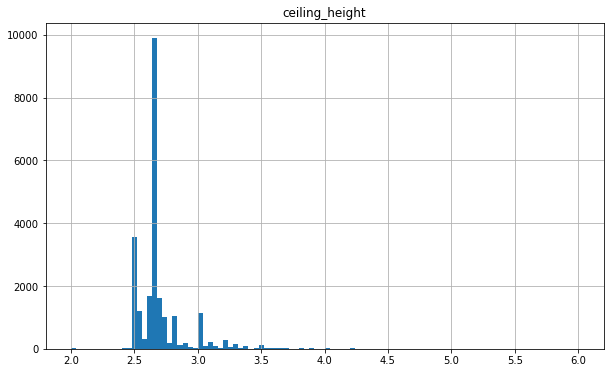

count   23552.000
mean        2.697
std         0.221
min         2.000
25%         2.600
50%         2.650
75%         2.700
max         6.000
Name: ceiling_height, dtype: float64


In [130]:
# Гистограмма для столбца высота потолков
df.hist('ceiling_height', bins=100, figsize = (10,6))
plt.show()
print(df['ceiling_height'].describe())

>Из гистограммы видно, что основная высота потолков лежит в интервале 2.5 - 2.7 метров.  
Средняя высота потолков составляет 2.7 метров.  
Отличительной особенностью Петербурга является старая застройка, с потолками выше 3 м


Столбец `floor`, этаж квартиры:

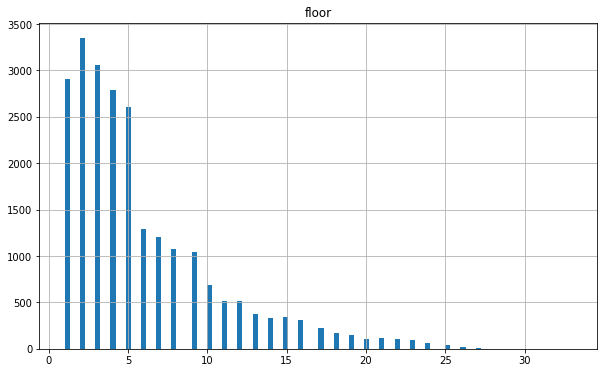

In [131]:
# Гистограмма для столбца этаж квартиры
df.hist('floor', bins=100, figsize = (10,6))
plt.show()

In [132]:
df['floor'].describe()

count   23552.000
mean        5.878
std         4.872
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

>Квартиры указанные в обьявлениях в основном находятся в интервале этажей с 1 по 5.  
Скорее всего это связано с тем, что квартиры из обьявлений находятся в 5 этажных домах.

Столбец `floor_group`, тип этажа квартиры:

In [133]:
floor_group = df.groupby('floor_group')['floor'].count()
print(floor_group)

floor_group
другой       17316
первый        2882
последний     3354
Name: floor, dtype: int64


<AxesSubplot:>

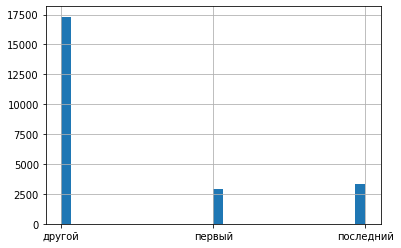

In [134]:
df['floor_group'].hist(bins=30)

>Чаще всего продаются квартиры, расположенные не на крайних этажах.  
Меньше всего продаются квартиры, расположенными на первых этажах.



Столбец `floors_total`, общее количество этажей в доме:

<AxesSubplot:>

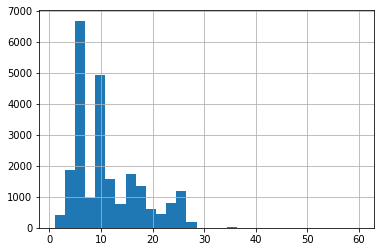

In [135]:
df['floors_total'].hist(bins=30)

In [136]:
df['floors_total'].describe()

count   23552.000
mean       10.675
std         6.593
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

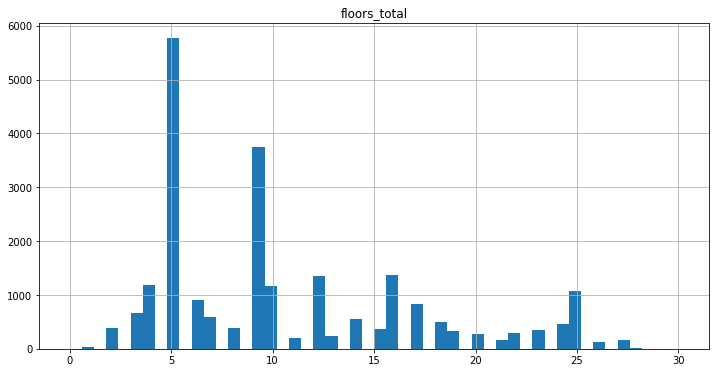

In [137]:
# Гистограмма для столбца общее количество этажей в доме
df.hist('floors_total',bins=50, range=(0,30), figsize=(12,6))
plt.show()

>5 и 9 этажных домов в обьявлениях больше всего, их 6000 и 4000 обьявлений соответственно.  
Остальные дома представлены менее широко.

Столбец `city_centers_nearest`, расстояние до центра города в метрах:

<AxesSubplot:xlabel='last_price'>

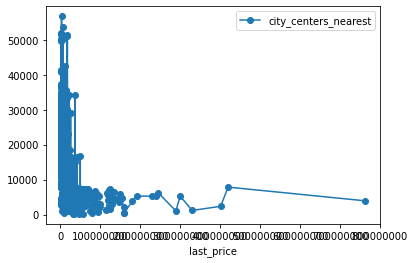

In [138]:
df.pivot_table(index='last_price', values='city_centers_nearest', aggfunc='mean').plot(style='o-')

>Самое дешевое жилье - максимально далеко от центра города. И наоборот.

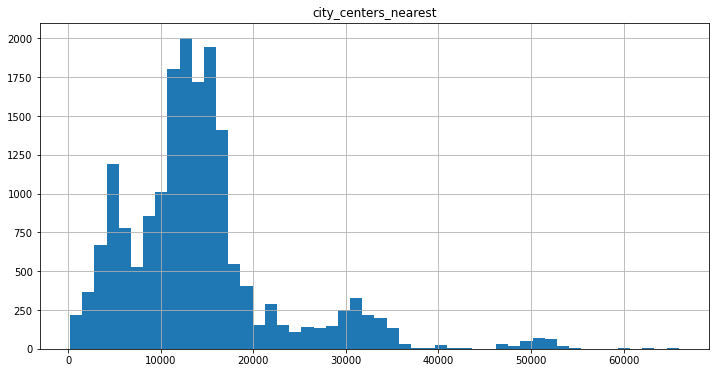

In [139]:
# Гистограмма для столбца расстояние до центра города в метрах
df.hist('city_centers_nearest', bins=50, figsize=(12,6))
plt.show()

In [140]:
df['city_centers_nearest'].describe()

count   18054.000
mean    14192.106
std      8614.214
min       181.000
25%      9238.000
50%     13096.500
75%     16285.000
max     65968.000
Name: city_centers_nearest, dtype: float64

>На гистограмме видно несколько пиков:  
>* Первый пик около 5000 метров. Это может быть связано с тем, что много объявлений размещено в небольших городах, где расстояние до центра города будет невелико.  
>* Второй пик 12000 - 15000 метров. Этот пик типичен для крупных городов. Основные продажи здесь приходятся на квартиры, которые расположены не на очень большом расстоянии до центра города.  
>* Третий пик 30000 метров.  
>* Четвертый пик 50000 метров.  
>Третий и четвертый пики, так же характерны для больших городов, скорее всего это спальные районы на окраинах города.

Столбец `airports_nearest`, расстояние до ближайшего аэропорта:

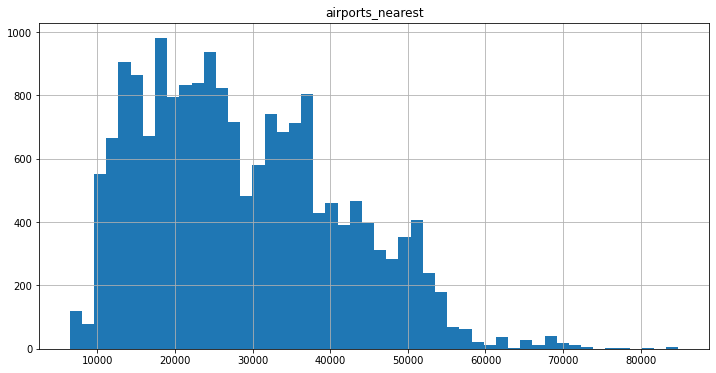

In [141]:
# Гистограмма для столбца расстояние до ближайшего аэропорта
df.hist('airports_nearest', bins=50, figsize=(12,6))
plt.show()

In [142]:
df['airports_nearest'].describe()

count   18030.000
mean    28798.971
std     12632.260
min      6450.000
25%     18567.000
50%     26756.500
75%     37274.500
max     84869.000
Name: airports_nearest, dtype: float64

>В основном квартиры продаются в домах, расположенных на расстоянии от 11000 до 37000 метров от ближайшего аэропорта.  
Так же есть пик на 51000 метров.  
Гистограмма говорит нам о том, что аэропорт находится на адекватном расстоянии от крупного города(51000 м).  
По пути в аэропорт, находятся множество населенных пунктов, на расстоянии менее 40000 м, до него.

Столбец `parks_nearest`, расстояние до ближайшего парка:

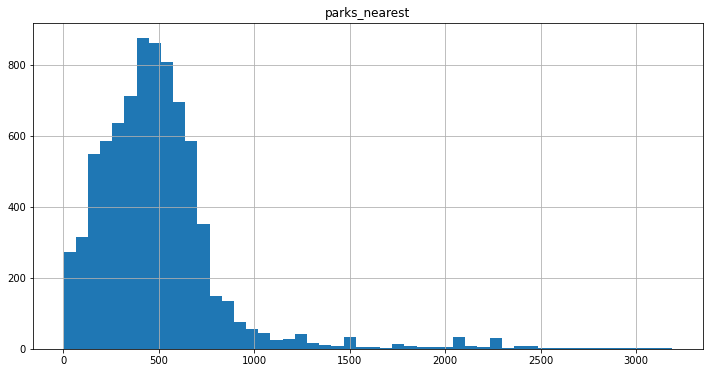

In [143]:
# Гистограмма для столбца расстояние до ближайшего парка
df.hist('parks_nearest', bins=50, figsize=(12,6))
plt.show()

In [144]:
df['parks_nearest'].describe()

count   8024.000
mean     490.629
std      341.656
min        1.000
25%      288.000
50%      455.000
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64

>Гистограмма говорит о том, что ближайшие парки, в основном, расположены в пределах 800 метров от дома.

Столбец `weekday`, день публикации объявления:

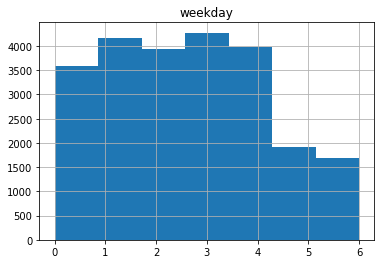

In [145]:
# Гистограмма для столбца день публикации объявления
df.hist('weekday', bins=7)
plt.show()

>В будние дни обьявления размещали примерно одинаково. В выходные объявления размещались в 2 раза реже, чем в будни.

Столбец `month`, месяц публикации объявления:

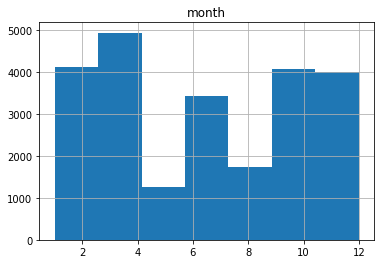

In [146]:
# Гистограмма для столбца месяц публикации объявления
df.hist('month', bins=7)
plt.show()

>Январь, май и декабрь - это месяцы в которые обьявления размещаются реже всего. Видимо это связано с праздниками.  
Пик размещения обьявлений приходится на март.  
Летом происодит небольшой спад размещения обьявлений.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

**Изучите, как быстро продавались квартиры (столбец `days_exposition`).  
Этот параметр показывает, сколько дней было размещено каждое объявление.** 

Для анализа скорости продажи квартир создадим вспомогательный датафрейм, в котором будут только те объекты недвижимости, в которых есть информация в столбце `days_exposition` (предположительно, это объекты, продажа которых завершена).

In [147]:
data_sold = df[~df['days_exposition'].isna()]

In [148]:
# Общая информация о продолжительности продаж квартир
data_sold['days_exposition'].describe()

count   20381.000
mean      180.696
std       219.726
min         1.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

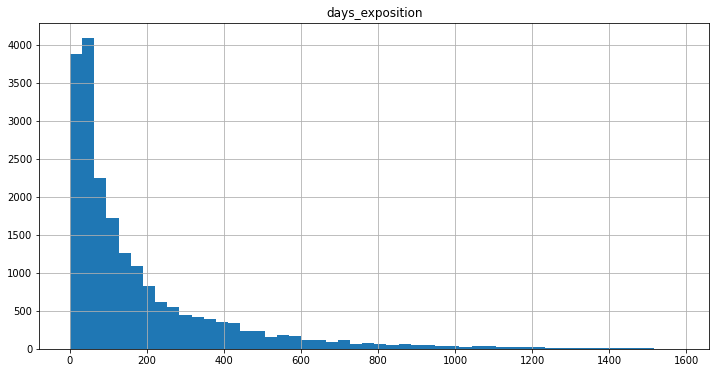

In [149]:
# Распределения данных в столбце `days_exposition`
df.hist('days_exposition', bins=50, figsize=(12,6))
plt.show()

Рассчитаем медиану и среднее для всех объявлений и выведем значения на экран:

In [150]:
print('Медианное время продажи квартир', data_sold['days_exposition'].median(), 'дней.')

Медианное время продажи квартир 95.0 дней.


In [151]:
print('Среднее время продажи квартир', data_sold['days_exposition'].mean(), 'дней.')

Среднее время продажи квартир 180.69594229920023 дней.


>Для определения быстрых и необычайно долгих продаж лучше всего ориентироваться на медианное значение - 95 дней (примерно 3 месяца).  
>
>Быстрыми продажами можно считать те, которые были совершены в 2 раза быстрее, чем медиана (т.е., быстрее 47 дней).  
>
>Долгими продажами можно считать те, которые находятся в интервале от полугода до года.
>
>Аномально долгими можно считать продажи, которые заняли свыше 500 дней (более 5 медианных значений).

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Для анализа влияния факторов на цену объекта недвижимости, построим матрицу диаграмм рассеяния для каждого из факторов, чтобы визуально оценить наличие связи между ценой и каждым из факторов (первый столбец матрицы).

#Запишем перечень факторов в переменную `list`.  

#Первой укажем цену, тогда первый столбец матрицы покажет нам цависимость цены от каждого из факторов.

In [152]:
#list=(['last_price',  # цена объекта
#       'total_area',  # общая площадь
#       'living_area', # жилая площадь
#       'rooms',       # количество комнат
#      'floor',       # тип этажа квартиры
#       'weekday',     # день публикации объявления
#      'month',       # месяц публикации объявления
#      'year'         # месяц публикации объявления
#      ])

In [153]:
#pd.plotting.scatter_matrix(df.loc[:,list], figsize=(15,15));

In [154]:
# Матрица коэффициентов корреляции, для каждого из параметров
#df.loc[:,list].corr()

In [155]:
df_price_area = df[['last_price','total_area','living_area','kitchen_area','rooms']]

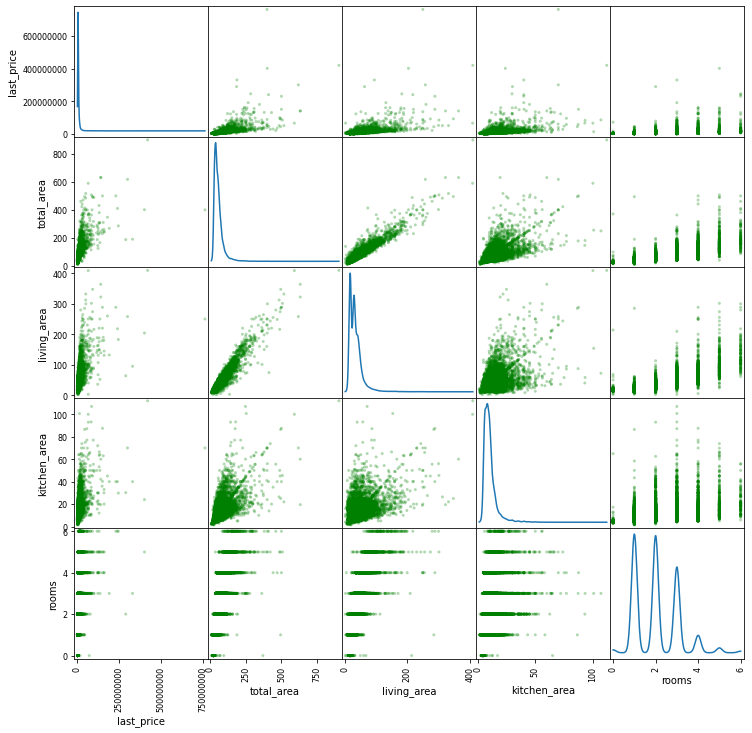

In [156]:
#Матрица диаграм рассеивания по 'last_price','total_area','living_area','kitchen_area','rooms'
pd.plotting.scatter_matrix(df_price_area, figsize=(12, 12),alpha =0.3,diagonal='kde', color = 'green');

In [157]:
# Матрица корреляции
df_price_area.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000,0.654,0.586,0.515,0.367
total_area,0.654,1.000,0.946,0.660,0.745
living_area,0.586,0.946,1.000,0.503,0.820
kitchen_area,0.515,0.660,0.503,1.000,0.291
rooms,0.367,0.745,0.820,0.291,1.000


`total_area` соотношение общей площади и цены составляет около 0.65 - Коэффициент положительный, это означает, что квартиры с большей площадью имеют большую цену. Кореляция средняя, ближе к высокой, что означает, что он имеет некоторую прогностическую ценность. 

`living_area` соотношение жилой площади и цены составляет около 0.59 - Коэффициент положительный. Так же мы помним, что у данной категории были пропуски в данных. В любом случае кореляция средняя, некоторая прогностическую ценность есть.  

`kitchen_area` соотношение площади кухни и цены составляет около 0.51 - Коэффициент положительный. Кореляция средняя, некоторая прогностическую ценность есть.  

`rooms` соотношение количества комнат и цены составляет около 0.37 - Коэффициент положительный. Кореляция слабая.

In [158]:
df1 = df.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area','rooms'])
df1.reset_index().head()

,last_price,kitchen_area,living_area,rooms,total_area
0,430000.000,7.725,23.577,1.500,42.200
1,440000.000,7.000,23.077,1.000,40.000
2,450000.000,6.634,23.203,1.750,40.100
3,470000.000,7.658,27.115,1.333,40.833
4,480000.000,5.600,16.000,1.000,32.000


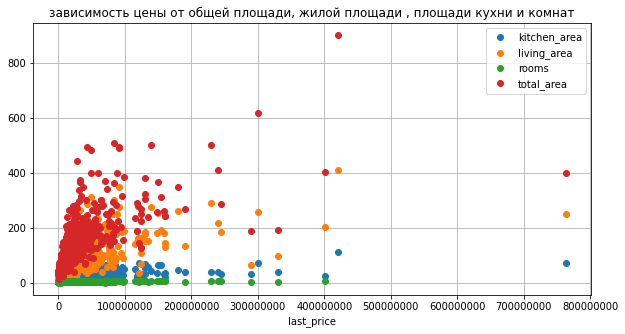

In [159]:
df1.plot(style='o',grid=True, figsize=(10, 5), title='зависимость цены от общей площади, жилой площади , площади кухни и комнат')
plt.show()

>Видим явную зависимость цены от общей площади и жилой площади, а вот от площади кухни - не особо.

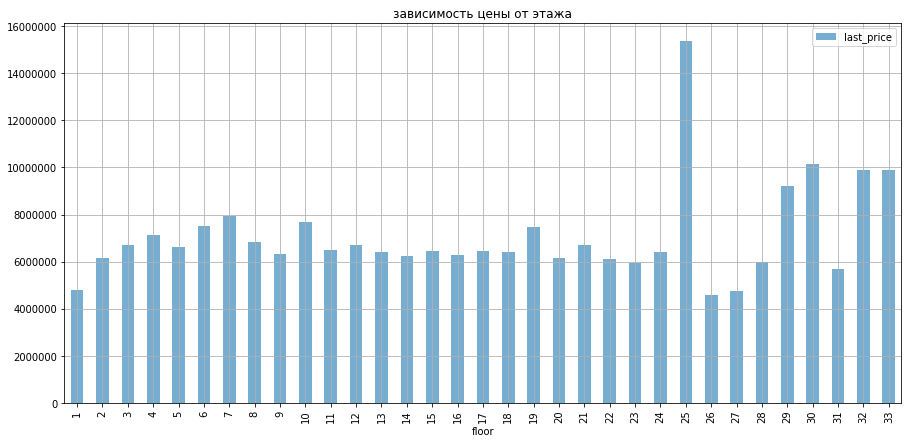

In [160]:
df.pivot_table(index=['floor'], values='last_price') \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,7), title='зависимость цены от этажа')
plt.show()

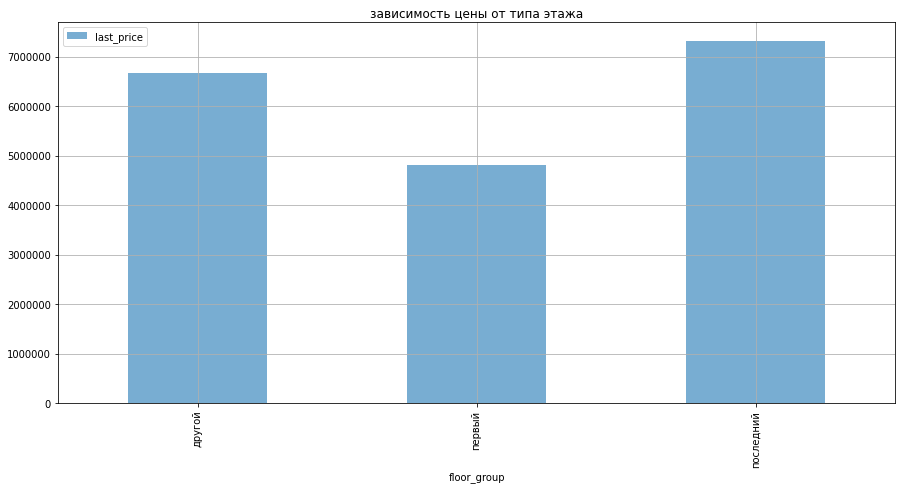

In [161]:
df.pivot_table(index=['floor_group'], values='last_price') \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,7), title='зависимость цены от типа этажа')
plt.show()

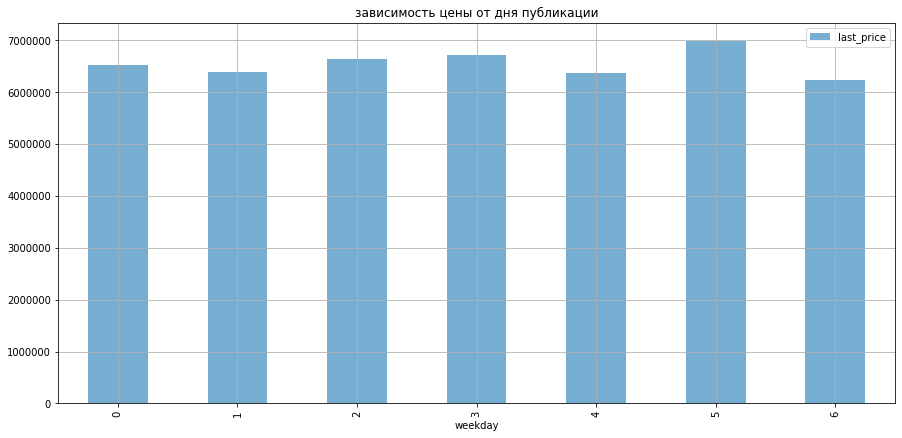

In [162]:
df.pivot_table(index=['weekday'], values='last_price') \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,7), title='зависимость цены от дня публикации')
plt.show()

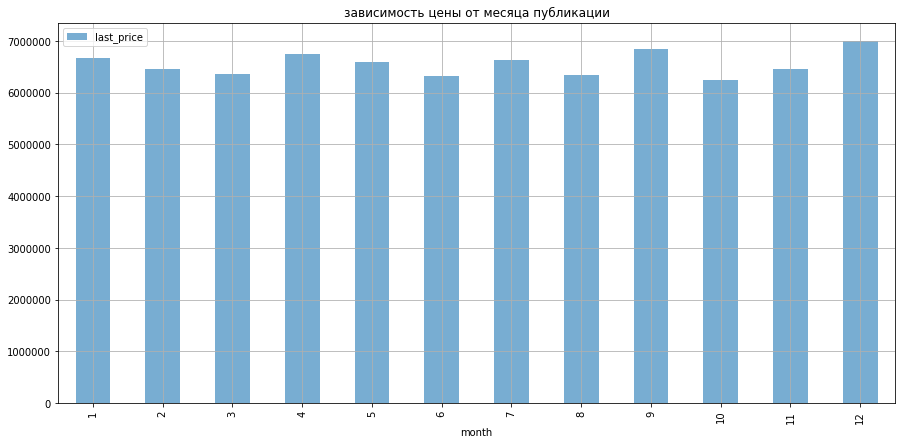

In [163]:
df.pivot_table(index=['month'], values='last_price') \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,7), title='зависимость цены от месяца публикации')
plt.show()

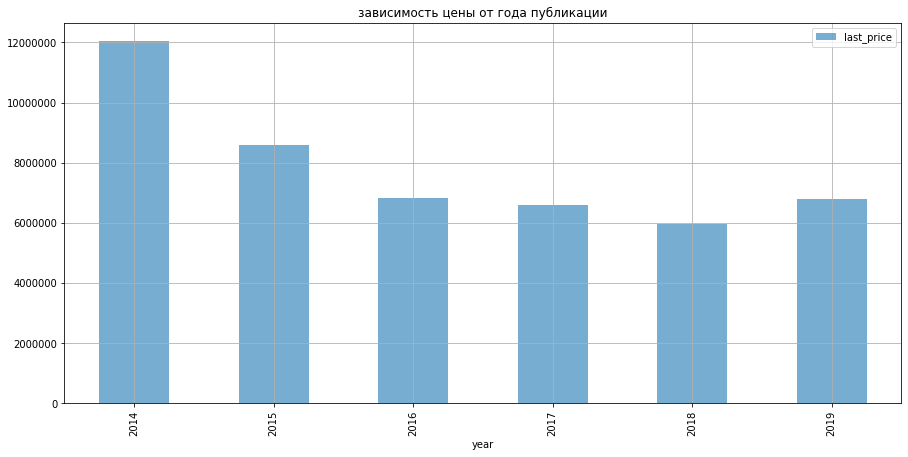

In [164]:
df.pivot_table(index=['year'], values='last_price') \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,7), title='зависимость цены от года публикации')
plt.show()

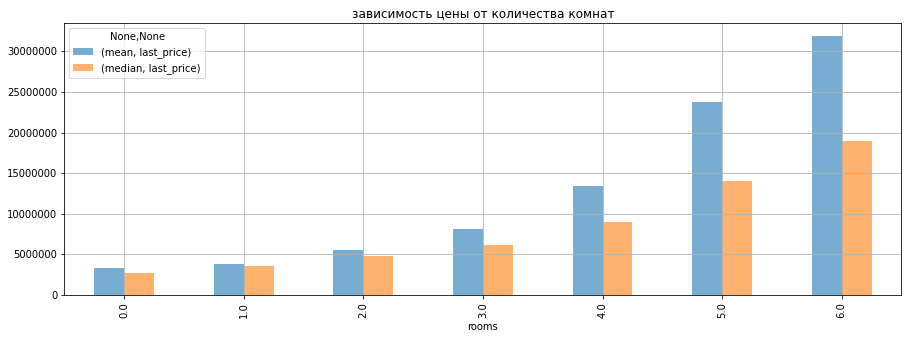

In [165]:
df.pivot_table(index=['rooms'], values='last_price', aggfunc=['mean', 'median']) \
          .plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,5), title='зависимость цены от количества комнат')
plt.show()

>Как видно из приведенных выше данных, первые три фактора (общая площадь, жилая площадь, площадь кухни) оказывают значительное влияние на цену.  
Количество комнат также оказывает влияние на цену, хотя заметно менее существенное.  
>
>Жилая площадь и площадь кухни входят в общую площадь, поэтому будем считать, что __общая площадь__ - главный фактор, влияющий на стоимость объекта недвижимости.  
Остальные факторы не оказывают существенного влияния на стоимость.  
>
>День публикации оказывает незначительное влияние на цену квартиры - самые дешевые предложения были размещены в пятницу и воскресенье, в остальные дни цена практически одинакова. 
>
>Месяц публикации оказывает незначительное влияние на цену квартиры - самый дешевый месяц - март, июнь, самые дорогие - сентябрь и декабрь 
>
>Влияние года публикации на цену квартиры - в 2014 году стоимость предложений была значительно выше, чем в остальные годы. 
>С 2015 года наблюдается стабильное падение цены, вплоть до незначительного роста в 2019.


**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Сначала отберем 10 населенных пунктов с наибольшим числом объявлений, и запишем список в переменную top_10:

In [166]:
top_10 = df['locality_name'].value_counts().index[0:10]
print(top_10)

Index(['Санкт-Петербург', 'поселок городского типа Мурино',
       'поселок городского типа Шушары', 'Всеволожск', 'Пушкин', 'Колпино',
       'поселок городского типа Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')


Посмотрим среднюю цену в каждом населенном пункте

In [167]:
(df
     .query('locality_name in @top_10')
     .pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
     .sort_values(by='price_m2',ascending=False))

,price_m2
locality_name,
Санкт-Петербург,114849.168
Пушкин,103125.374
деревня Кудрово,92473.087
поселок городского типа Парголово,90175.489
поселок городского типа Мурино,85629.111
поселок городского типа Шушары,78550.884
Колпино,75424.151
Гатчина,68745.694
Всеволожск,68654.008


Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [168]:
min_price = df.groupby('locality_name')['price_m2'].mean().min()
max_price = df.groupby('locality_name')['price_m2'].mean().max()

Посмотрим, в каком населенном пункте самые низкие цены на недвижимость:

In [169]:
df.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @min_price')

,price_m2
locality_name,
деревня Старополье,11206.000


Посмотрим, в каком населенном пункте самые высокие цены на недвижимость:

In [170]:
df.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @max_price')

,price_m2
locality_name,
Зеленогорск,115122.500


>Среди 10 населенных пунктов с самым большим количеством объявлений, самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге.

**Квартиры в Санкт-Петербурге**

Для начала создадим отдельную таблицу:

In [171]:
data_center_spb = df.loc[df['locality_name']=='Санкт-Петербург',['last_price', 'city_centers_km']].reset_index(drop=True)
#data_center_spb['city_centers_km'] = data_center_spb['city_centers_km'].astype('int')
data_center_spb.head(10)

,last_price,city_centers_km
0,13000000.000,16.000
1,5196000.000,14.000
2,64900000.000,7.000
3,10000000.000,8.000
4,7915000.000,12.000
5,5400000.000,15.000
6,5050000.000,14.000
7,4650000.000,14.000
8,6700000.000,11.000
9,4180000.000,15.000


Построим сводную таблицу:

In [172]:
final_data_spb = data_center_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean')
final_data_spb['last_price_mln'] = final_data_spb['last_price']/1000000
print(final_data_spb)

                  last_price  last_price_mln
city_centers_km                             
0.000           31449115.852          31.449
1.000           21206720.828          21.207
2.000           17788319.613          17.788
3.000           11137394.687          11.137
4.000           13304279.529          13.304
5.000           14455995.621          14.456
6.000           15338418.387          15.338
7.000           14775152.586          14.775
8.000            9950003.649           9.950
9.000            6977188.404           6.977
10.000           6500434.162           6.500
11.000           6229140.580           6.229
12.000           5834953.463           5.835
13.000           6077642.599           6.078
14.000           5624898.350           5.625
15.000           5876322.987           5.876
16.000           5373130.560           5.373
17.000           5299495.923           5.299
18.000           5091331.322           5.091
19.000           5051410.032           5.051
20.000    

Визуализируем эти данные:

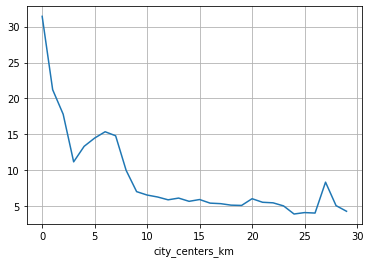

In [173]:
final_data_spb['last_price_mln'].plot(grid=True);

>На расстоянии до 3 км от центра Петербурга, находятся самые дорогие квартиры.  
Цена на расстоянии до 6-7 км от центра выше, чем на расстоянии от 3 до 5 км.  
Это может быть связано с годом сдачи дома, инфраструктурой и т.д.  
Далее цена снижается вплоть до 26 км от центра. В 27 км от центра она несколько выше, чем в близлежащих областях, что может быть так же связано с различными факторами.

### Общий вывод

В процессе исследования на начальном этапе была проведена подготовка данных, в ходе которой были устранены пропущенные значения, изменены типы данных, удалены дубликаты, найдены и устранены аномалии.  
В результате подготовки были удалены 0,62 % сведений исходного датафрейма, что никак не могло сказаться на точности исследования.  
Далее были добавлены несколько столбцов, которые были нужны нам для анализа.  
В конечном итоге по результатам анализа можно сделать следующие выводы:  
>* Основную долю рынка составляют одно- и двухкомнатные квартиры площадью от 30 до 50 кв.м.
>
>* Средняя стоимость жилья на рынке находится в промежутке от 3,5 до 4 млн. рублей
>
>* Большую часть рынка составляют пяти- и девятиэтажные дома
>
>* На продажу выставлены в основном квартиры, расположенные не на крайних этажах
>
>* Медианное время продажи жилья составляет примерно 3 месяца
>
>* Главным фактором, влияющим на стоимость объекта недвижимости, является общая площадь
>
>* Самое дорогое жилье располагается в Санкт-Петербурге (стоимость 1 кв.м. равна почти 115 тыс. рублей), а самое дешевое - в Выборге (стоимость 1 кв.м. чуть больше 58 тыс. рублей) (статистика по топ-10 городов по числу объявлений)
>
>* В пределах Санкт-Петербурга стоимость жилья самая высокая в пределах 3 км от центра города

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод